78question

In [12]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [13]:
dataset=pd.ExcelFile("V02Max_Combined.xlsx")

In [16]:
Athletes=pd.read_excel(dataset, sheet_name='Athletes')
Kayaking=pd.read_excel(dataset, sheet_name='Kayaking')
Triathlon=pd.read_excel(dataset, sheet_name='Triathlon')
Fencing=pd.read_excel(dataset, sheet_name='Fencing')

C:\Users\NagarjunaPujala\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\NagarjunaPujala\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\NagarjunaPujala\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [18]:
combined=pd.concat([Kayaking,Triathlon,Fencing])
merged=pd.merge(combined,Athletes,on='ID')

### QS.78 Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.


<Axes: title={'center': 'Heart rate zones by minutes and the number of athletes in each HR and each minute'}, xlabel='time_min', ylabel='HR ZONE'>

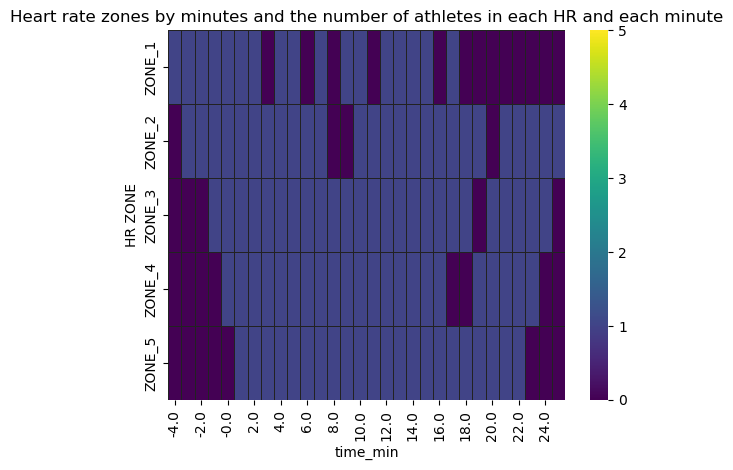

In [28]:
combined['HR']= (60/(combined['RR']/1000)).round(0)
combined['time_min']=(combined['time']/60).round(0)
combined.loc[(combined['HR']<=100),"HR ZONE"]="ZONE_1"    
combined.loc[(combined['HR']>=100) & (combined['HR']<=120),"HR ZONE"]="ZONE_2"
combined.loc[(combined['HR']>=120) & (combined['HR']<=135),"HR ZONE"]="ZONE_3"
combined.loc[(combined['HR']>=135) & (combined['HR']<=155),"HR ZONE"]="ZONE_4"
combined.loc[(combined['HR']>=155) ,"HR ZONE"]="ZONE_5"


g = combined.groupby(['time_min','HR ZONE','ID'])
cnt = g.ID.nunique()
df=cnt.to_frame(name="counts")
df1=df.groupby(['HR ZONE','time_min'])['counts'].sum().reset_index()
result = pd.crosstab(df1['HR ZONE'], df1['time_min'])
plt.title("Heart rate zones by minutes and the number of athletes in each HR and each minute")
sns.heatmap(result,cmap='viridis',vmax=5,vmin=0,linewidth=0.5,linecolor="#222")